In [1]:
pip install flask

Note: you may need to restart the kernel to use updated packages.


In [16]:
# Import the Flask class from the flask package
from flask import Flask

# Create a Flask application instance
# __name__ tells Flask where to find resources and how to configure paths
app = Flask(__name__)

# Define a route for the root URL ("/")
# When someone visits http://localhost:5000/, this function will run
@app.route("/")
def home():
    # The response returned to the browser
    return "Home"

# Notes on HTTP methods:
# GET    - Retrieve data from the server
# POST   - Create a new resource on the server
# PUT    - Update an existing resource
# DELETE - Remove a resource

# This block ensures the app only runs if this file is executed directly,
# not if it's imported as a module in another file
if __name__ == "__main__":
    # Start the Flask development server
    # debug=True enables helpful error messages and auto-reload
    # use_reloader=False prevents the app from running twice
    app.run(debug=True, use_reloader=False)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [04/Jan/2026 15:29:16] "GET / HTTP/1.1" 200 -


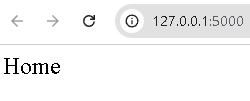

In [17]:
# Keep imports in cells
from flask import Flask, jsonify

# Create the Flask application instance
# __name__ tells Flask where this file lives
app = Flask(__name__)

# Define a route for the root URL
# Visiting http://127.0.0.1:5000/ will trigger this function
@app.route("/")
def home():
    return "Home works"  # Return a simple text response

# Define another route that returns JSON
# Visiting http://127.0.0.1:5000/test will trigger this function
@app.route("/test")
def test():
    # jsonify converts a Python dict into a proper JSON HTTP response
    return jsonify({"status": "ok"})

# Print all registered routes for debugging
print(app.url_map)

# Start the Flask development server
# host="127.0.0.1" means local-only access
# port=5000 is the default Flask port
# debug=False disables debug mode
# use_reloader=False prevents double-starting in some environments
app.run(host="127.0.0.1", port=5000, debug=False, use_reloader=False)



Map([<Rule '/static/<filename>' (OPTIONS, HEAD, GET) -> static>,
 <Rule '/' (OPTIONS, HEAD, GET) -> home>,
 <Rule '/test' (OPTIONS, HEAD, GET) -> test>])
 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [04/Jan/2026 15:30:29] "GET / HTTP/1.1" 200 -


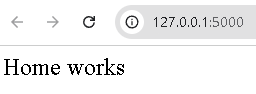

In [18]:
# Keep imports in cells
from flask import Flask, request, jsonify

# Create the Flask application instance
app = Flask(__name__)

# Root route: simple text response
@app.route("/")
def home():
    return "Home works"

# Route with a dynamic path parameter <user_id>
# Example: /get-user/42
@app.route("/get-user/<user_id>", methods=["GET"])
def get_user(user_id):

    # Base user data returned in the JSON response
    user_data = {
        "user_id": user_id,
        "name": "John Doe",
        "email": "john@yahoo.com"
    }

    # Optional query parameter: ?extra=value
    # Example: /get-user/42?extra=hello
    extra = request.args.get("extra")
    if extra:
        user_data["extra"] = extra

    # Return JSON response with HTTP 200 OK
    return jsonify(user_data), 200

# Print all registered routes for debugging
print(app.url_map)

# Start the Flask development server
app.run(host="127.0.0.1", port=5000, debug=False, use_reloader=False)

#Paste http://127.0.0.1:5000/get-user/42 in browser while running the code

Map([<Rule '/static/<filename>' (OPTIONS, HEAD, GET) -> static>,
 <Rule '/' (OPTIONS, HEAD, GET) -> home>,
 <Rule '/get-user/<user_id>' (OPTIONS, HEAD, GET) -> get_user>])
 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [04/Jan/2026 15:31:33] "GET /get-user/42 HTTP/1.1" 200 -


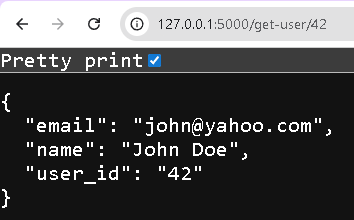

In [19]:
# Keep imports in cells
from flask import Flask, request, jsonify

# Create the Flask application instance
app = Flask(__name__)

# Root route: simple text response
@app.route("/")
def home():
    return "Home works"

# GET route with a dynamic path parameter <user_id>
# Example: /get-user/42
@app.route("/get-user/<user_id>", methods=["GET"])
def get_user(user_id):

    # Base user data returned in the JSON response
    user_data = {
        "user_id": user_id,
        "name": "John Doe",
        "email": "john@yahoo.com"
    }

    # Optional query parameter: ?extra=value
    # Example: /get-user/42?extra=hello
    extra = request.args.get("extra")
    if extra:
        user_data["extra"] = extra

    # Return JSON response with HTTP 200 OK
    return jsonify(user_data), 200

# POST route to create a user
# This must be tested in Postman or similar tool
@app.route("/create-user", methods=["POST"])
def create_user():

    # Read JSON body from the incoming POST request
    data = request.get_json()

    # Return the same data back with HTTP 201 Created
    return jsonify(data), 201

# Print all registered routes for debugging
print(app.url_map)

# Start the Flask development server
app.run(host="127.0.0.1", port=5000, debug=False, use_reloader=False)


Map([<Rule '/static/<filename>' (OPTIONS, HEAD, GET) -> static>,
 <Rule '/' (OPTIONS, HEAD, GET) -> home>,
 <Rule '/get-user/<user_id>' (OPTIONS, HEAD, GET) -> get_user>,
 <Rule '/create-user' (OPTIONS, POST) -> create_user>])
 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [04/Jan/2026 15:32:27] "POST /create-user HTTP/1.1" 201 -


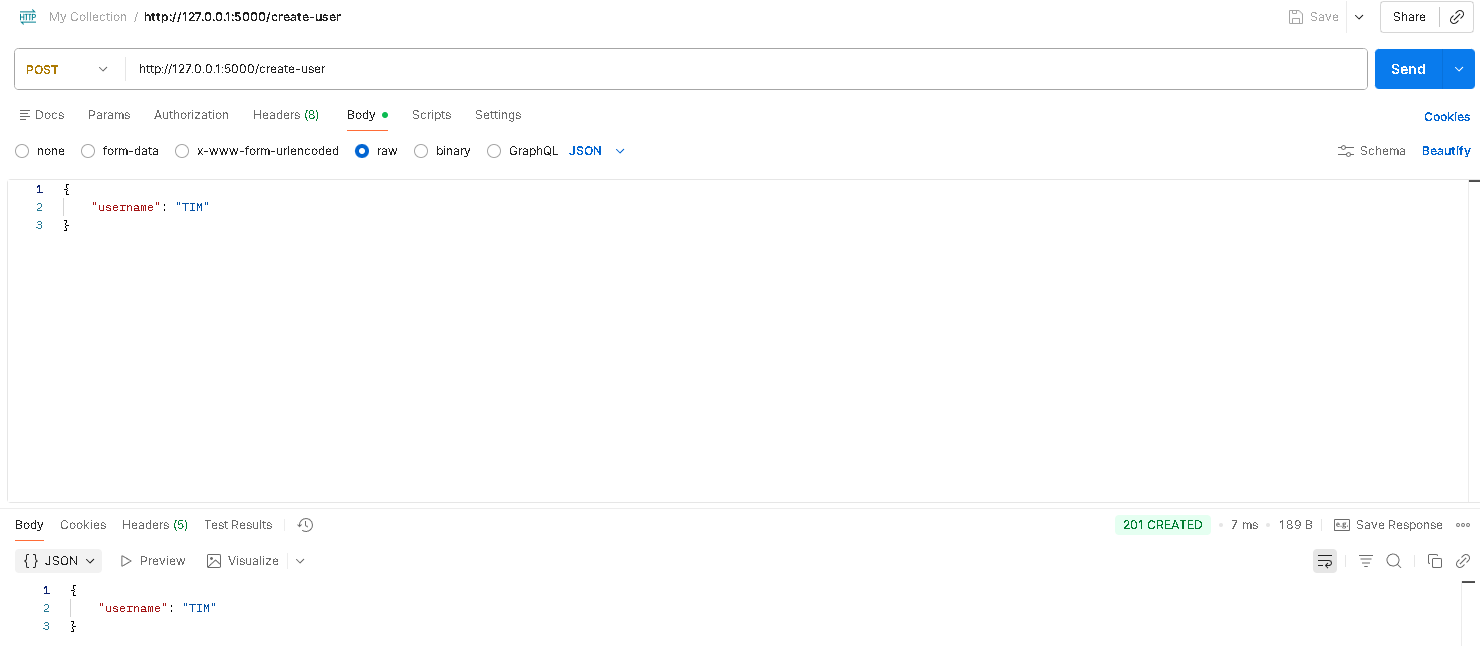